#### Libraries Import:

glob       > For Files name reading from directory.

pandas     > For Datamanipulation and analysis.

cv2        > called opencv, Image processing and Computer vision tasks.

numpy      > Mathametics and Multi-dimensional arrays and matrices handling.

matplotlib > plotting library showing graphs and images

skimage    > Image processing and computer vision library.

sklearn    > DataScience, Machine Learning techniques library.

In [1]:
import glob
import pandas as pd  # as means that we use pandas library short form  as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt # matplotlib is big library, we are just calling pyplot function 
                                    # for showing images
from skimage.feature import hog #We are calling only hog  

from sklearn.decomposition import PCA # Calling the PCA funtion from sklearn
from sklearn.svm import SVC # # Calling the SVM function from sklearn
from sklearn.externals import joblib # Calling the joblib function from sklearn, use for model saving 
                                     # and loading.

#### Libraries version:

Below are the current version of libraries the program is tested on

In [2]:
# to get the version information we need to call for full library
import matplotlib
import skimage 
import sklearn

In [3]:
print ('Pandas Version: ',pd.__version__)
print ('OpenCv Version: ',cv2.__version__)
print ('Numpy Version: ',np.__version__)
print ('Matplotlib Version: ',matplotlib.__version__)
print ('skimage Version: ',skimage.__version__)
print ('sklearn Version: ',sklearn.__version__)

Pandas Version:  0.24.2
OpenCv Version:  3.3.1
Numpy Version:  1.16.3
Matplotlib Version:  3.0.3
skimage Version:  0.15.0
sklearn Version:  0.20.3


### Training Data Annotation Reading:

The Annotations or taging of images are saved in csv file. It contains all the images names, bounding box coordinates respective to class ID. What we are going to do in this step is to read all csv files in each folder of training data. And then merge them and make one. Reason for doing this is to make easiness when training SVM.

Commands Explaination:

1. glob.glob(*.file_extension)  >Read all the file depending on the file extension given after *. it will return files path

2. pd.read_csv()                >Read the csv file using pandas. As this csv file seprated by ';' thats why we use sep=; to get same sequence column values.

3. main_Training.append()       >Append the csv files in pandas as stacking file. Main training is main file and new doc appending on it.

In [4]:
Training_Images_Directory='dataset/Training' #training dataset directory.

In [5]:
csv_files_training=glob.glob(Training_Images_Directory+'/**/*.csv',recursive=True) # recursive true means it will check 
                                                                          # folder inside the folder as well.
main_Training=pd.read_csv(csv_files_training[0],sep=';') # reading first csv and assining it main csv.
for i in range(1,len(csv_files_training)): # for loop iteration from 1 to number of files, by this way can get the all the files read by csv_files using glob.
    new_doc=pd.read_csv(csv_files_training[i],sep=';') # reading the new csv file as new doc
    main_Training=main_Training.append(new_doc, ignore_index=True) # appending the csv files making a big csv that consists of all the csv files.
main_Training

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00025_00000.ppm,57,61,5,5,52,56,1
1,00025_00001.ppm,82,88,7,7,74,81,1
2,00025_00002.ppm,107,118,9,10,98,108,1
3,00029_00000.ppm,57,61,5,5,51,55,1
4,00029_00001.ppm,73,79,6,7,67,72,1
5,00029_00002.ppm,128,75,11,6,116,69,1
6,00079_00000.ppm,100,112,8,9,91,103,1
7,00079_00001.ppm,132,151,11,13,120,137,1
8,00079_00002.ppm,264,167,22,14,242,153,1
9,00136_00000.ppm,80,84,7,7,73,76,1


### Visulization of Classes Images:

For Visulization of seperate classes images, we first need to select one images from the training data folder. For this we choose first image read by main_training dataset. and then make a new pandas Dataframe that consists of one images of each class, we assigned it One_Example. You can look on it then observe the classID. After that I use matplotlib to display the images one by one in a stack manner.

Commands Explaination:

1. if main_Training.values[i,-1] not in sss     > sss is the list, which saves values of classid. We are iterating the i so that we can read each row of upper diffine main_training dataset of csv's. main_Training.values[i,-1] shows the last column of that row that is class id. so what are we doing if the classid is not in sss then only run it otherwise not.

2. .append()    > Append use for list to append some new values.

3. pd.DataFrame   > Making a new pandas_data frame from list or array. as we are storing each class one row in oneexample list then we make dataframe that shown below.

4. .head()     > Pandas dataframe only head lines show hat means only start line showing.

5. plt.figure()  > Initlizing the new figure using plt. and figure size is [x,y] respective.

6. plt.subplots_adjust()   > plt adjusting the subplot parameters in this case we are adjusting the word space between two subplots.

7. Pandas['column_name']  > This is used for reading the specific column in pandas.

8. cv2.imread(img_path)   > Reading the image using opencv.

9. img[y1:y2,x1:x2]       > Used for taking the specific part of image or croping it. we use it in 8 line of below ploting box

10. cv2.cvtColor()         > Changing the color type like(hsv,bgr,rgb). In default opencv read bgr color for visulizing the right color we need to convert it RGB channel colors.

11. plt.subplot(rows,column,place_numbers) > plt subplot give easy way to plot multiple images to one place.

12. plt.imshow(image)  > displaying the image.

13. cv2.imwrite(filename.png,image) > Saving the image.

In [8]:
sss=[] # making a new list.
oneexample=[]
for i in range(len(main_Training.values)): # iterating 0-len(main_Training.values) that is training dataset lenght.
    if main_Training.values[i,-1] not in sss:
        oneexample.append(main_Training.values[i,:]) #appending the main_Training dataset row number i.
        sss.append(main_Training.values[i,-1]) # appending the class id of row number i
        
# Making a new pandas dataframe from oneexample list. and giving it columns names.        
One_Example=pd.DataFrame(oneexample,columns=['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId'])
One_Example

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00025_00000.ppm,57,61,5,5,52,56,1
1,00208_00000.ppm,322,347,27,29,294,318,14
2,00002_00000.ppm,81,84,7,7,74,77,17
3,00006_00000.ppm,56,61,5,5,50,55,19
4,00375_00000.ppm,244,252,20,21,223,230,21
5,00020_00000.ppm,82,74,7,6,75,67,35
6,00004_00000.ppm,72,75,6,6,66,68,38
7,00012_00000.ppm,110,71,9,6,100,65,45


In [31]:
One_Example['ClassId'][i],One_Example['Filename'][i]

(1, '00025_00000.ppm')

In [34]:
csv_files_training

'dataset/Training\\00014\\GT-00014.csv'

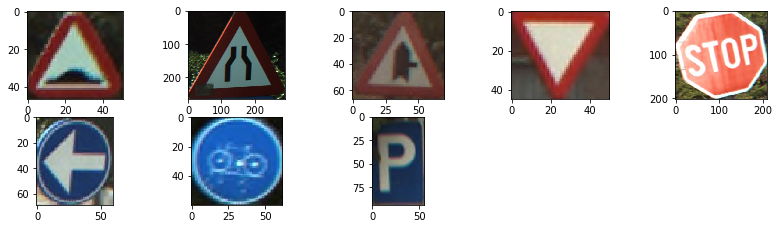

In [35]:
plt.figure(figsize=[14,25]) # set image size
plt.subplots_adjust(wspace = 0.2)# set distance between the subplots

i = 0 # i is the index use for subploting the means at what number subplot will be plot. 
for i in range(len(One_Example)): # range depends on number of classes
    # we are getting the image path from csv_files name thats is dataset/Training\\00000\\GT-00000.csv
    # then spliting it at GT and we have dataset/Training\\00000\\ after that adding the name of one
    # example that we are dealing like dataset/Testing\\00001\\01983_00002.ppm
    img_path=csv_files_training[i].split('GT')[0]+One_Example['Filename'][i] 
    img = cv2.imread(img_path) # opencv use for reading image.
    # croping the image based on the coordinates given us by csv files
    crop_image=img[One_Example['Roi.Y1'][i]:One_Example['Roi.X2'][i],One_Example['Roi.X1'][i]:One_Example['Roi.Y2'][i]]
    #converting the color RGB so that we can actually view it.
    crop_image=cv2.cvtColor(crop_image,cv2.COLOR_BGR2RGB)
    plt.subplot(13,5,i+1)
    i+=1
    imgplot = plt.imshow(crop_image)
plt.show() # plot showing at the end.

### Saving the classes Images:

We need to save each class images so that we can use it as testing time drawing it adjasent to detected image.class image name is same classID.png. All images will be saved in 'classes_images' folder. if 'classes_images' directory doesn't exist then you need to make it.

In [37]:
for i in range(len(One_Example)): # range depends on number of classes
    # we are getting the image path from csv_files name thats is dataset/Training\\00000\\GT-00000.csv
    # then spliting it at GT and we have dataset/Training\\00000\\ after that adding the name of one
    # example that we are dealing like dataset/Testing\\00001\\01983_00002.ppm
    img_path=csv_files_training[i].split('GT')[0]+One_Example['Filename'][i] 
    img = cv2.imread(img_path) # opencv use for reading image.
    # croping the image based on the coordinates given us by csv files
    crop_image=img[One_Example['Roi.Y1'][i]:One_Example['Roi.X2'][i],One_Example['Roi.X1'][i]:One_Example['Roi.Y2'][i]]
    cv2.imwrite('classes_images/'+str(One_Example['ClassId'][i])+'.png',crop_image) # use for saving the image.

### Histogram of oriented gradients (HOG) Features from Images

HOG decomposes an image into small squared cells, computes an histogram of oriented gradients in each cell, normalizes the result using a block-wise pattern, and return a descriptor for each cell. We Stack the cells into a squared image region used it as an image window descriptor for object detection, by SVM Classifier. 

![HoG Example](Results/hog_crop.png)


We are using HoG from skimage library built in function. skimage Compute a Histogram of Oriented Gradients (HOG) by

1. computing the gradient image in x and y

2. computing gradient histograms

3. normalising across blocks

4. flattening into a feature vector

At first computes order image gradients. These capture contour, silhouette and some texture information, while providing further resistance to illumination variations. The locally dominant color channel is used, which provides color invariance to a large extent. Variant methods may also include second order image derivatives, which act as primitive bar detectors - a useful feature for capturing, e.g. bar like structures in bicycles and limbs in humans.

The third stage aims to produce an encoding that is sensitive to local image content while remaining resistant to small changes in pose or appearance. The adopted method pools gradient orientation information locally in the same way as the SIFT 2 feature. The image window is divided into small spatial regions, called “cells”. For each cell we accumulate a local 1-D histogram of gradient or edge orientations over all the pixels in the cell. This combined cell-level 1-D histogram forms the basic “orientation histogram” representation. Each orientation histogram divides the gradient angle range into a fixed number of predetermined bins. The gradient magnitudes of the pixels in the cell are used to vote into the orientation histogram.

The fourth stage computes normalisation, which takes local groups of cells and contrast normalises their overall responses before passing to next stage. Normalisation introduces better invariance to illumination, shadowing, and edge contrast. It is performed by accumulating a measure of local histogram “energy” over local groups of cells that we call “blocks”. The result is used to normalise each cell in the block. Typically each individual cell is shared between several blocks, but its normalisations are block dependent and thus different. The cell thus appears several times in the final output vector with different normalisations. This may seem redundant but it improves the performance. We refer to the normalised block descriptors as Histogram of Oriented Gradient (HOG) descriptors.

The final step collects the HOG descriptors from all blocks of a dense overlapping grid of blocks covering the detection window into a combined feature vector for use in the window classifier.[[0]](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)




Command Explaination:

1. cv2.resize(input_image, (new width,new hight))  >  For resizing the image to new dimension, in this case we choose 

2. hog(crop_image, orientations=8)  >  Apply hog features on crop image. in 8 different orientations gradients. in our case it returns the 2592 size array.

    

In [167]:
def images_to_hog(main,Images_Directory): # function defining that can be call for both test and training
    Features=[]
    Labels=[]
    for i in range(0,len(main)): #len(main)
        # we are getting the image path from csv_files name thats is dataset/Training\\00000\\GT-00000.csv
        # then spliting it at GT and we have dataset/Training\\00000\\ after that adding the name of one
        # example that we are dealing like dataset/Testing\\00001\\01983_00002.ppm
        img_path=Images_Directory+'/00000'[:-len(str(main['ClassId'][i]))]+str(main['ClassId'][i])+'/'+main['Filename'][i]
        img = cv2.imread(img_path) # opencv use for reading image.
        # croping the image based on the coordinates given us by csv files
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.medianBlur(img,3)
        crop_image=img[main['Roi.Y1'][i]:main['Roi.X2'][i],main['Roi.X1'][i]:main['Roi.Y2'][i]]
        crop_image=cv2.resize(crop_image, (64, 64)) #Resize the image to 64*64.
        # Apply Hog from skimage library it takes image as crop image.Number of orientation bins that gradient
        # need to calculate.
        ret,crop_image = cv2.threshold(crop_image,127,255,cv2.THRESH_BINARY)
        descriptor = hog(crop_image, orientations=8,pixels_per_cell=(4,4))
        Features.append(descriptor)#hog features saving
        Labels.append(main['ClassId'][i])#class id saving
    
    Features=np.array(Features)# converting to numpy array.
    Labels=np.array(Labels)
    return Features,Labels

In [168]:
Features_Training,Labels_Training=images_to_hog(main_Training,Training_Images_Directory) # giving values to images_to_hog function
print ('Training HOG output Features shape : ',Features_Training.shape)
print ('Training HOG output Labels shape: ',Labels_Training.shape)

Training HOG output Features shape :  (925, 14112)
Training HOG output Labels shape:  (925,)


### Test Data Annotation Reading:

Reading all the test csv files and merging them as same as we done in training part.

In [169]:
Test_Images_Directory='dataset/Testing'

In [170]:
csv_files_Testing=glob.glob(Test_Images_Directory+'/**/*.csv',recursive=True) # recursive true means it will check
                                                                              # folder inside the folder as well.
main_Testing=pd.read_csv(csv_files_Testing[0],sep=';') # reading first csv and assining it main csv.
# for loop iteration from 1 to number of files, by this way can get the all the files read by csv_files using glob.
for i in range(1,len(csv_files_Testing)):
    new_doc=pd.read_csv(csv_files_Testing[i],sep=';')# reading the new csv file as new doc
    # appending the csv files making a big csv that consists of all the csv files.
    main_Testing=main_Testing.append(new_doc, ignore_index=True)
main_Testing

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,01983_00000.ppm,105,110,9,9,95,100,1
1,01983_00001.ppm,216,213,18,18,197,195,1
2,01983_00002.ppm,69,76,6,6,63,69,1
3,01987_00000.ppm,58,63,5,5,53,57,1
4,01987_00001.ppm,85,97,7,8,78,89,1
5,01987_00002.ppm,157,176,13,15,143,161,1
6,01988_00000.ppm,191,216,16,18,175,197,1
7,01988_00001.ppm,92,103,8,9,83,94,1
8,01988_00002.ppm,62,68,5,6,56,62,1
9,01991_00000.ppm,57,60,5,5,51,55,1


In [171]:
Features_Testing,Labels_Testing=images_to_hog(main_Testing,Test_Images_Directory) # giving values to images_to_hog function
print ('Testing HOG output Features shape : ',Features_Testing.shape)
print ('Testing HOG output Labels shape: ',Labels_Testing.shape)

Testing HOG output Features shape :  (898, 14112)
Testing HOG output Labels shape:  (898,)


### PCA on HOG Features

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process. 

In our case Our Features output from HOG length is 2592, thats take time when we calculate the SVM and model try to overfit. so thats why we apply pca to reduce 2592 components to 100. [[1]](https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2)

Command Explaination:

1. PCA(n_components=n) > Calling the function from sklearn, with number of components are fixed to 100.

2. pca.fit_transform(Dataset) > It has two parts, at first it Fit the model on dataset, remembar the fitting weights and parameters then apply the dimensionality reduction to the same dataset as transform.

3. pca.transform(new_Dataset) > The same trained PCA can be applied to new dataset using transform command on that dataset.


In [172]:
# Applying PCA
pca = PCA(n_components = 40)
X_train = pca.fit_transform(Features_Training)
X_test = pca.transform(Features_Testing)

print ('New Train Dataset shape after PCA: ',X_train.shape)
print ('New Test Dataset shape after PCA: ',X_test.shape)

New Train Dataset shape after PCA:  (925, 40)
New Test Dataset shape after PCA:  (898, 40)


### SVM Classifier


A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

One Example is shown in below pictures where you can see the data to divide into two dimentional space.

![SVM 2 dimentional](Results/1_Sg6wjASoZHPphF10tcPZGg.png)


The learning of the hyperplane in linear SVM is done by transforming the problem using some linear algebra. This is where the kernel plays role. The kernel functions are used to map the original dataset (linear/nonlinear ) into a higher dimensional space with view to making it linear dataset. The linear, polynomial and RBF or Gaussian kernel are simply different in case of making the hyperplane decision boundary between the classes. Usually linear and polynomial kernels are less time consuming and provides less accuracy than the rbf or Gaussian kernels. 

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

Gaussian RBF(Radial Basis Function) is another popular Kernel method used in SVM models for more. RBF kernel is a function whose value depends on the distance from the origin or from some point. Gaussian Kernel is of the following format;

![Guassian Kernal Format](Results/guassian_kernal.png)

||X1 — X2 || = Euclidean distance between X1 & X2
Using the distance in the original space we calculate the dot product (similarity) of X1 & X2.

Note: similarity is the angular distance between two points.

Parameters:

1. C: Inverse of the strength of regularization.
Behavior: As the value of ‘c’ increases the model gets overfits.

As the value of ‘c’ decreases the model underfits.We are using default C=1.0

2. γ : Gamma (used only for RBF kernel)

Behavior: As the value of ‘ γ’ increases the model gets overfits.

As the value of ‘ γ’ decreases the model underfits. gamma='scale' uses 1 / (n_features * X.var()) as value of gamma/





In [173]:
# Fitting classifier to the Training set
classifier=SVC(kernel='rbf',gamma='scale') # Calling the function SVC to implement SVM
classifier.fit(X_train,Labels_Training) # Training the Classifier on Train date

print ('SVM Mean Accuracy of Training dataset: ',classifier.score(X_train,Labels_Training))
print ('SVM Mean Accuracy of Test dataset: ',classifier.score(X_test,Labels_Testing))

SVM Mean Accuracy of Training dataset:  0.9254054054054054
SVM Mean Accuracy of Test dataset:  0.8552338530066815


In [174]:
# Saving the model. this model will be used when we test on on new data rather then train each time.
joblib.dump(pca, 'pca.pkl') # joblib.dump Persist an arbitrary Python object into one file
joblib.dump(classifier, 'svm.pkl') 

['svm.pkl']

### Model Testing on Image:

Lets test the model on some image and implement all the code for one image, the code will first load the image apply HOG then apply SVM and predict the class and show the ground truth image.



In [175]:
# Loading the mode into same name
pca = joblib.load('pca.pkl')
classifier = joblib.load('svm.pkl')

In [176]:
image_number=100 # select the image number from test dataset and see its result.

Reading Image from Path:  dataset/Testing/00017/02295_00001.ppm


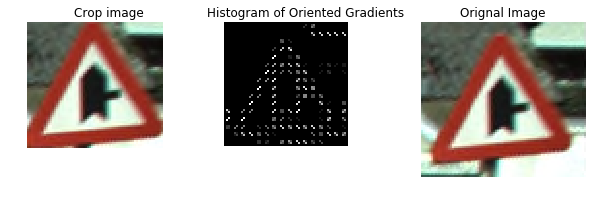

Predicted Class:  17


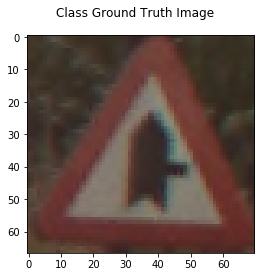

In [177]:
from skimage.exposure import exposure #for displaying th hog image.
# img_path=csv_files_Testing[main_Testing['ClassId'][image_number]].split('GT')[0]+main_Testing['Filename'][image_number]
img_path=Test_Images_Directory+'/00000'[:-len(str(main_Testing['ClassId'][image_number]))]+str(main_Testing['ClassId'][image_number])+'/'+main_Testing['Filename'][image_number]
print ('Reading Image from Path: ',img_path)
img = cv2.imread(img_path)
crop_image=img[main_Testing['Roi.Y1'][image_number]:main_Testing['Roi.X2'][image_number],main_Testing['Roi.X1'][image_number]:main_Testing['Roi.Y2'][image_number]]
img0=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img0 = cv2.medianBlur(img0,3)

crop_image0=img0[main_Testing['Roi.Y1'][image_number]:main_Testing['Roi.X2'][image_number],main_Testing['Roi.X1'][image_number]:main_Testing['Roi.Y2'][image_number]]
crop_image0=cv2.resize(crop_image0, (64, 64))

# Apply Hog from skimage library it takes image as crop image.Number of orientation bins that gradient
# need to calculate.
ret,crop_image0 = cv2.threshold(crop_image0,127,255,cv2.THRESH_BINARY)
descriptor,imagehog  = hog(crop_image0, orientations=8,pixels_per_cell=(4,4),visualize=True)


# descriptor,imagehog = hog(crop_image0, orientations=8, visualize=True)
descriptor_pca=pca.transform(descriptor.reshape(1,-1))

# Initilize the 3 axis so that we can plot side by side
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)

#ploting crop image
ax1.axis('off')
ax1.imshow(cv2.cvtColor(crop_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax1.set_title('Crop image')

# Rescale histogram for better display,Return image after stretching or shrinking its intensity levels
hog_image_rescaled = exposure.rescale_intensity(imagehog, in_range=(0, 10))
#ploting Hog image
ax2.axis('off')
ax2.imshow(imagehog, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
#ploting Orignal image
ax3.axis('off')
ax3.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax3.set_title('Orignal Image')
plt.show()
# class predition of image using SVM
Predicted_Class=classifier.predict(descriptor_pca)[0]
print ('Predicted Class: ',Predicted_Class)

ground_truth_image=cv2.imread('classes_images/'+str(Predicted_Class)+'.png')

fig = plt.figure()
plt.imshow(cv2.cvtColor(ground_truth_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
fig.suptitle('Class Ground Truth Image')
plt.show()